<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from google.colab import files
import yfinance as yf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

In [25]:
stocklist = ['GFI', 'FSR']
stocks = [i + '.JO' for i in stocklist]
stocks

['GFI.JO', 'FSR.JO']

In [27]:
start = "2013-03-01"
end = "2024-02-28"


df = yf.download(['GFI.JO', 'FSR.JO'], start=start, end=end)

df.head()

/tmp/ipython-input-2495352864.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GFI.JO', 'FSR.JO'], start=start, end=end)
[*********************100%***********************]  2 of 2 completed


Price             Close                      High                       Low  \
Ticker           FSR.JO       GFI.JO       FSR.JO       GFI.JO       FSR.JO   
Date                                                                          
2013-03-01  3121.474121  7431.278809  3132.409222  7503.097879  3062.822219   
2013-03-04  3064.810303  7250.467773  3126.444503  7385.142120  3032.005003   
2013-03-05  3201.001709  7257.450195  3201.001709  7283.387474  3083.697920   
2013-03-06  3107.556641  6928.246094  3220.884042  7299.348692  3105.568441   
2013-03-07  3114.515381  7453.974609  3156.267582  7503.853990  3095.627480   

Price                           Open                 Volume            
Ticker           GFI.JO       FSR.JO       GFI.JO    FSR.JO    GFI.JO  
Date                                                                   
2013-03-01  7338.512509  3084.692420  7465.193370  12379894   5930842  
2013-03-04  7250.467773  3126.444503  7370.178304  14174847   4128626  
2013-03-05  7217.546689  3100.597618  7262.438134  16391688   5666832  
2013-03-06  6928.246094  3202.990242  7258.447599  18189945   6130247  
2013-03-07  7237.498098  3132.409181  7282.389541  18272095  10489933

In [28]:
Close = df['Close']
Close.head()

Ticker,FSR.JO,GFI.JO
Date,,
2013-03-01,3121.474121,7431.278809
2013-03-04,3064.810303,7250.467773
2013-03-05,3201.001709,7257.450195
2013-03-06,3107.556641,6928.246094
2013-03-07,3114.515381,7453.974609


In [29]:
gfi_close = Close['GFI.JO']

gfi_close = pd.DataFrame(gfi_close)
gfi_close['Target'] = (gfi_close['GFI.JO'].shift(-1) > gfi_close['GFI.JO']).astype(int)
gfi_close.dropna(inplace=True)

display(gfi_close.head())

,GFI.JO,Target
Date,,
2013-03-01,7431.278809,0
2013-03-04,7250.467773,1
2013-03-05,7257.450195,0
2013-03-06,6928.246094,1
2013-03-07,7453.974609,0


In [30]:
X = gfi_close[['GFI.JO']]
y = gfi_close['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2237, 1) (2237,)
Testing set shape: (560, 1) (560,)


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set scaled shape:", X_train_scaled.shape)
print("Testing set scaled shape:", X_test_scaled.shape)

Training set scaled shape: (2237, 1)
Testing set scaled shape: (560, 1)


In [32]:
knn = KNeighborsClassifier(n_neighbors=2) # ADJUST NEEAREST NEIGHBOURS HERE
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
y_pred = knn.predict(X_test_scaled)

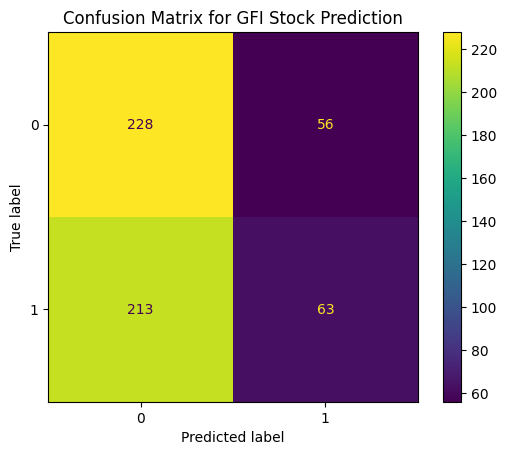

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix for GFI Stock Prediction')
plt.show()

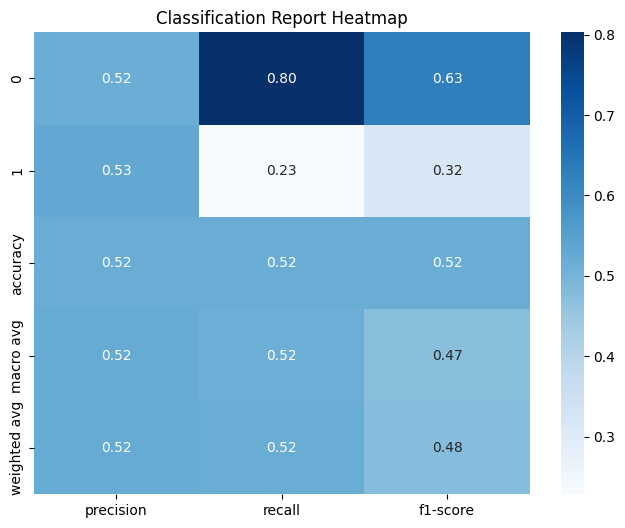

In [35]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

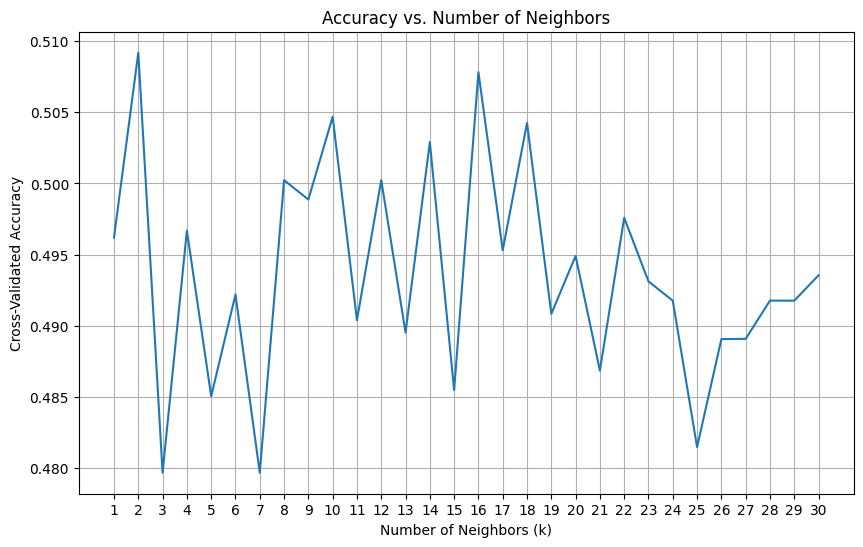

The optimal number of neighbors is: 2


In [37]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"The optimal number of neighbors is: {optimal_k}")